<a href="https://colab.research.google.com/github/daeukk/Chronic-Wound-Detection-Using-Yolov8/blob/main/YOLOv8_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-08d091de-e8f1-65a9-093e-52ea559f9c63)


In [2]:
!lscpu |grep 'Model name'

Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 23.2/166.8 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2DrBJT5FDE9WprKGs3bU")
project = rf.workspace("project-tvs2o").project("wound-detection-v3")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=bfe408de59a80470de0c298c70328d82aa8a8a830c5465082d32a660bf878798
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.81, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Wound-Detection-v3-1 in yolov8:: 100%|██████████| 4750/4750 [00:00<00:00, 8462.07it/s]


In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 152MB/s]
Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Wound-Detection-v3-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, f

/content


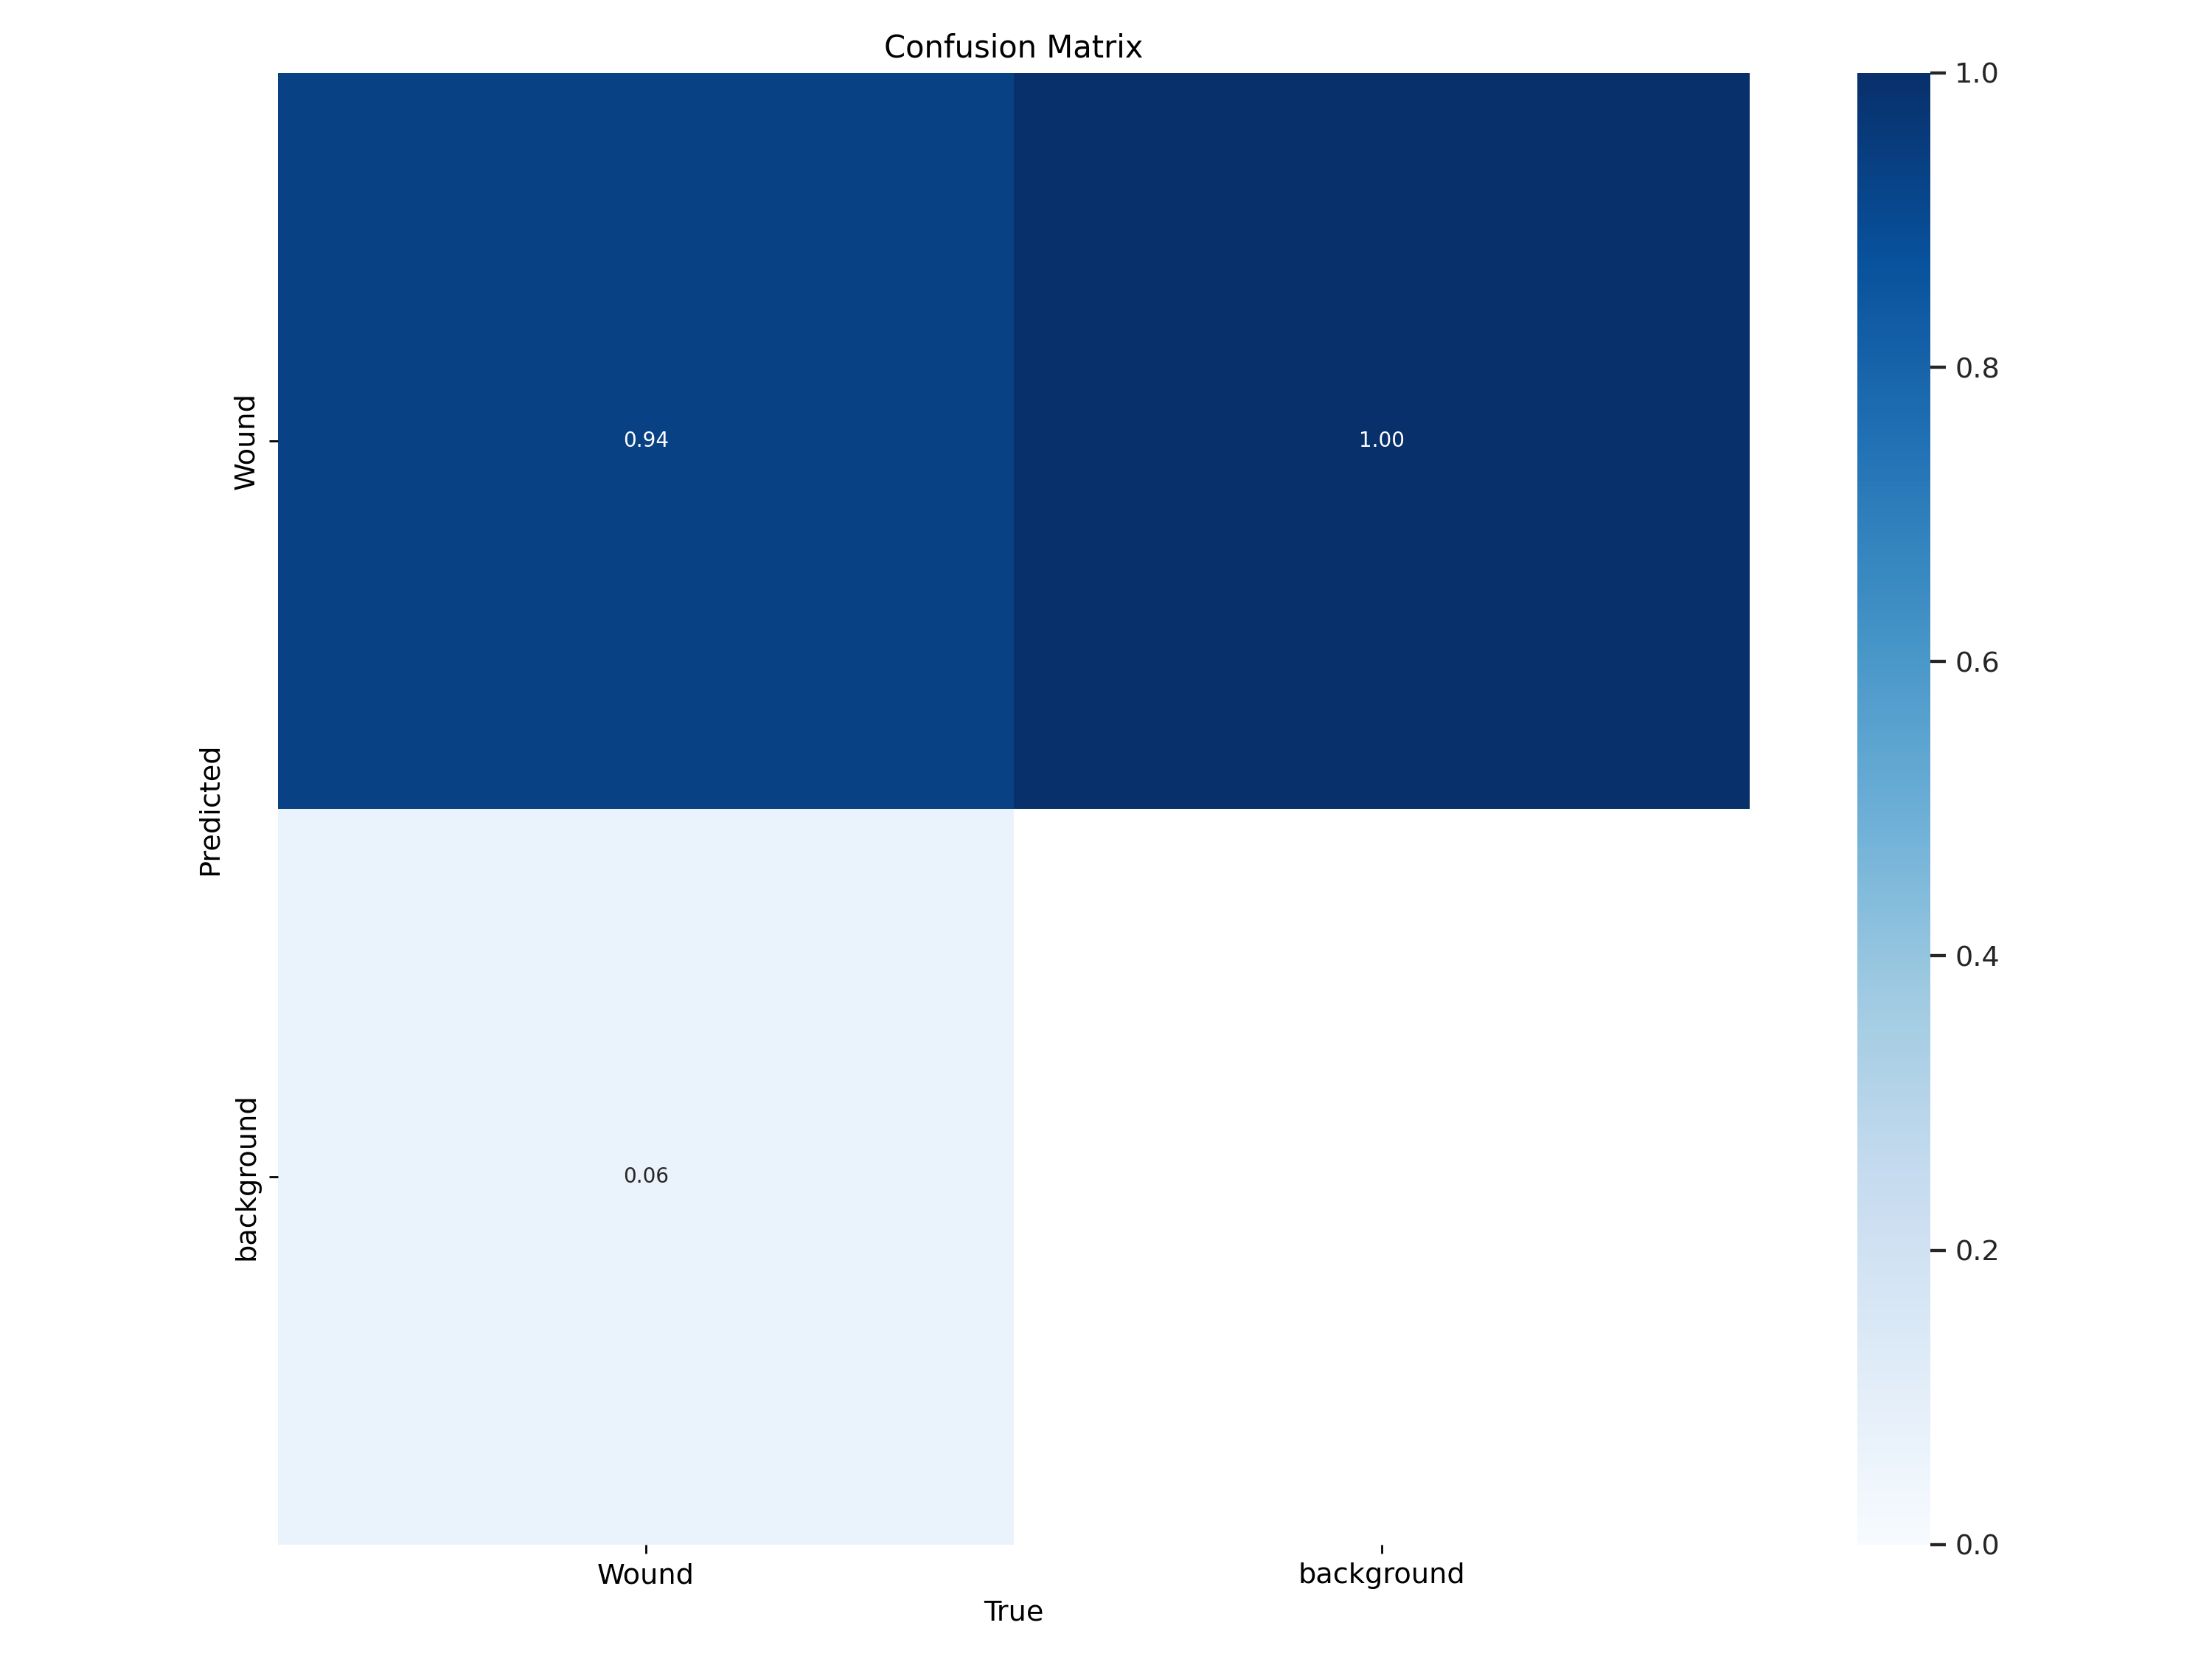

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png',width=600)

In [16]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Wound-Detection-v3-1/valid/labels.cache... 148 images, 0 backgrounds, 0 corrupt: 100% 148/148 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:03<00:00,  2.93it/s]
                   all        148        187      0.891      0.877      0.907      0.404
Speed: 1.3ms preprocess, 4.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val


In [17]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/148 /content/Wound-Detection-v3-1/test/images/105_jpg.rf.d878f2471acbb67e61ab6aef227e38b5.jpg: 640x640 1 Wound, 6.8ms
image 2/148 /content/Wound-Detection-v3-1/test/images/108_jpg.rf.6fc13d0db920da49156ae27e39f51306.jpg: 640x640 2 Wounds, 6.2ms
image 3/148 /content/Wound-Detection-v3-1/test/images/117_jpg.rf.c394153f1de903ab72af1325c39ba174.jpg: 640x640 1 Wound, 6.0ms
image 4/148 /content/Wound-Detection-v3-1/test/images/119_jpg.rf.aa1545cde9eaa524458f4a85bbc7d88e.jpg: 640x640 2 Wounds, 5.9ms
image 5/148 /content/Wound-Detection-v3-1/test/images/11_jpg.rf.9cecadddf52c657df2ed58720d4476e2.jpg: 640x640 1 Wound, 6.1ms
image 6/148 /content/Wound-Detection-v3-1/test/images/121_jpg.rf.f4840622c7b995e167fe18d7483f5cb1.jpg: 640x640 1 Wound, 8.1ms
image 7/148 /content/Wound-Detection-v3-1/test/images

/content


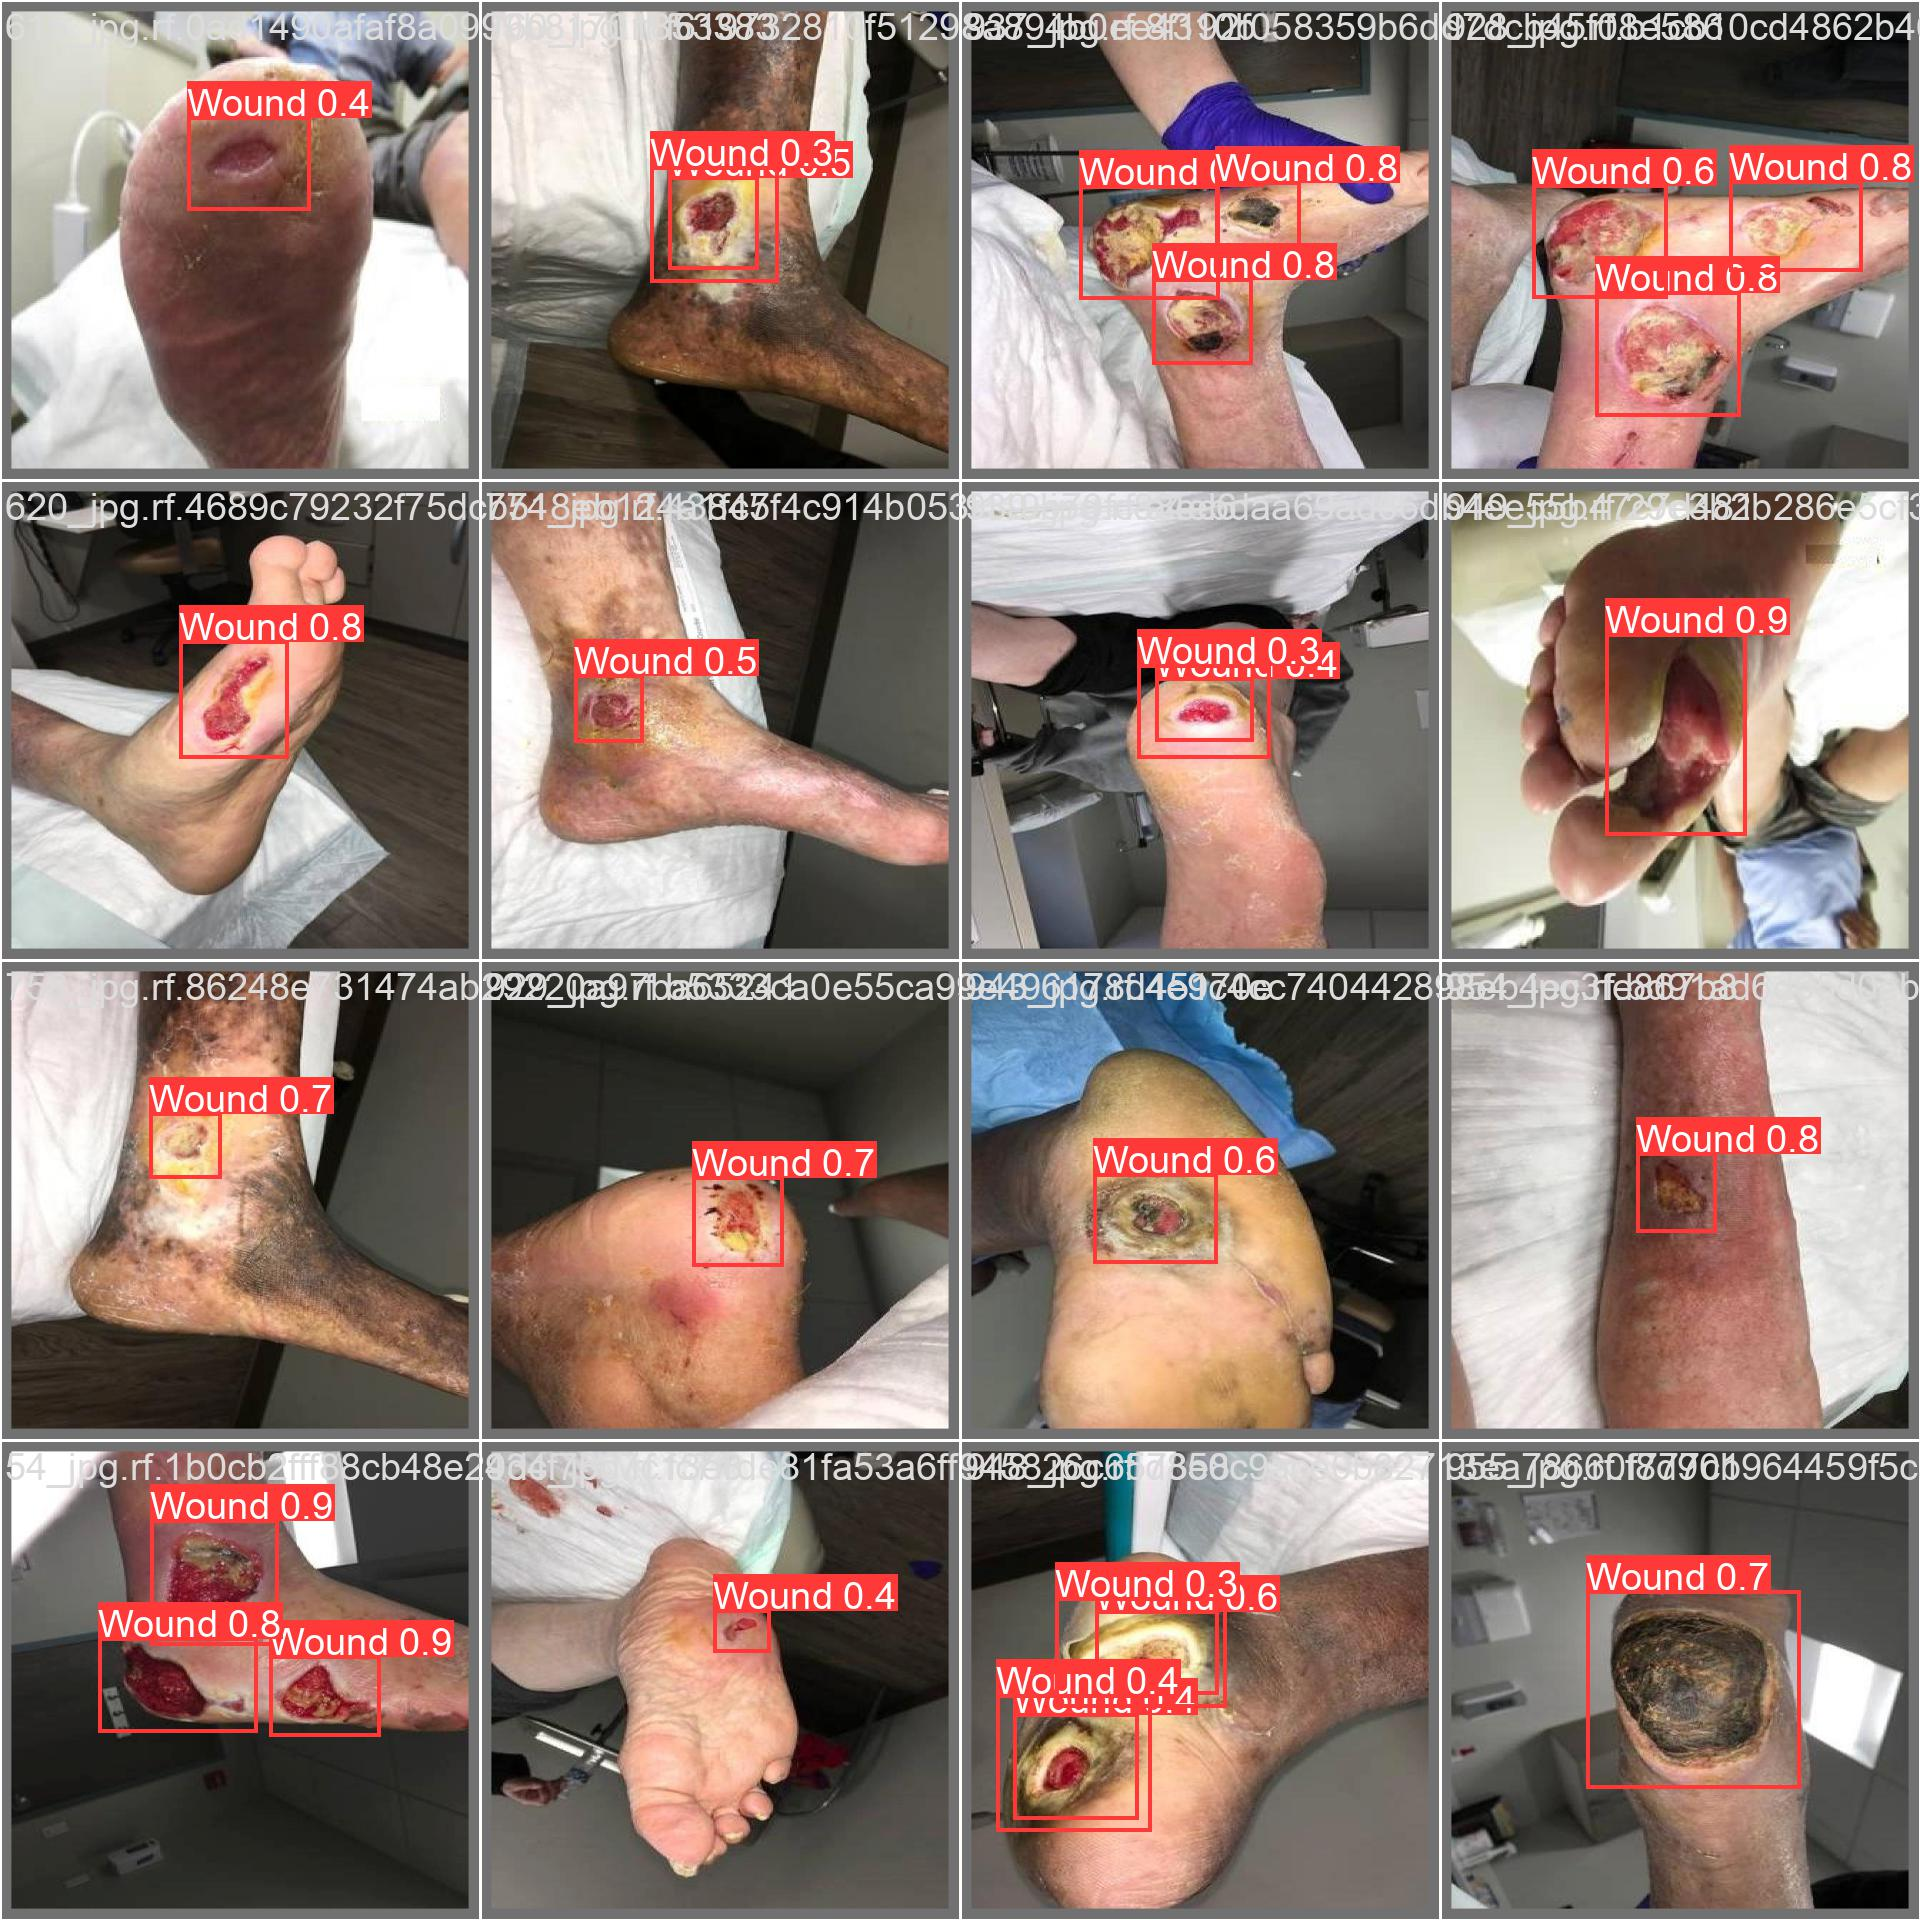

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch1_pred.jpg',width=600)

In [20]:
!zip -r export.zip runs/detect
!zip -r export.zip runs/detect/train2/weights/best.pt

updating: runs/detect/ (stored 0%)
updating: runs/detect/predict/ (stored 0%)
updating: runs/detect/predict/121_jpg.rf.f4840622c7b995e167fe18d7483f5cb1.jpg (deflated 5%)
updating: runs/detect/predict/465_jpg.rf.47c9083859a3c35fc41573c83085bee7.jpg (deflated 4%)
updating: runs/detect/predict/671_jpg.rf.92811aee21e249bacdec1628c70524e1.jpg (deflated 6%)
updating: runs/detect/predict/181_jpg.rf.38d6313a18de51d3481a305d12e5a120.jpg (deflated 4%)
updating: runs/detect/predict/290_jpg.rf.da778661419e7ffc59176c9aa360a3f4.jpg (deflated 5%)
updating: runs/detect/predict/716_jpg.rf.67ae0593f8ad1df16751827ce0c0407a.jpg (deflated 3%)
updating: runs/detect/predict/323_jpg.rf.813313d6d4904e51ed4154d4c73978cf.jpg (deflated 5%)
updating: runs/detect/predict/105_jpg.rf.d878f2471acbb67e61ab6aef227e38b5.jpg (deflated 7%)
updating: runs/detect/predict/922_jpg.rf.5fe7dc2716acb055c6241c4c9920cbb6.jpg (deflated 4%)
updating: runs/detect/predict/793_jpg.rf.fe1fe1a0ba8ad305c526fede9dc10e6a.jpg (deflated 11%)
u